In [55]:
from ucimlrepo import fetch_ucirepo
import pandas as pd


breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  

X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 



1. 
The goal of this assignment is to train a binary classifier for predicting the cancer diagnosis (malignant / benign) as well as testing the performance of the classifier.

In [ ]:
df = pd.concat([X, y], axis=1)
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


2. 
The dataset contains variables with numeric suffixes (1, 2, and 3), each representing a different dimension. All of these variables are of type float, while Diagnosis is the only variable with an object data type (B, M).

3. 

First, 'Diagnosis' column is dropped from the dataset leaving only numeric values to train on. 'y' corresponds to 'Diagnosis' which we want to predict. After that, data is being standardized and the model is being built.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns = 'Diagnosis')
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

4. 
70% of the data is extracted and 30% is left for testing. In this test. The kNN model is trained with k = 3. Accuracy is calculated on the test set.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test set
y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.98


Testing differnt k values.

In [59]:
for k in [1, 3, 5, 7, 9, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}, accuracy = {acc:.3f}")

k = 1, accuracy = 0.959
k = 3, accuracy = 0.982
k = 5, accuracy = 0.977
k = 7, accuracy = 0.971
k = 9, accuracy = 0.982
k = 15, accuracy = 0.982


The results are the same for k = 3, 9, and 15.

5. 
Creating confusion matrix and evaluating the results


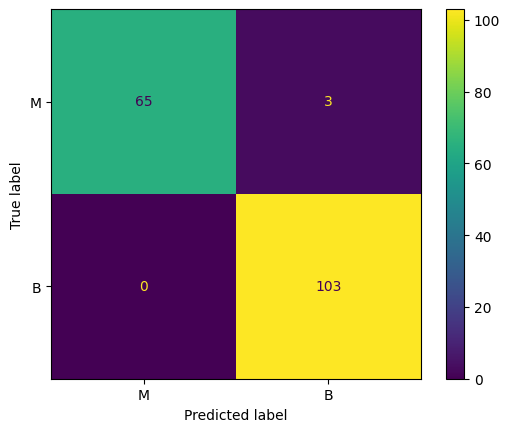

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred_test = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test, labels=['M', 'B'])
cmd = ConfusionMatrixDisplay(cm, display_labels=['M','B'])
cmd.plot()


From this, we can determine metric parameters for binary classification.

In [61]:
TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

accuracy = (TP+TN)/(TP+FP+FN+TN)
precision = TP/(TP+FP)
reacall = TP/(TP+FN)

print(f"Accurcay: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Reacall: {reacall:.2f}")

Accurcay: 0.98
Precision: 1.00
Reacall: 0.96
